In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#loading dataset
df = pd.read_csv('case_study.csv')

In [23]:
df.head()

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,7/1/2009,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,4/13/2009,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,4/21/2009,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,8/3/2009,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,4/13/2009,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...


In [25]:
df.shape

(8819, 24)

In [27]:
df.isnull().sum()

LeadCreated                    5798
FirstName                      5798
Email                          5798
VendorLeadID                   5798
CallStatus                     7938
WidgetName                     5798
PublisherZoneName              5798
PublisherCampaignName          5798
AddressScore                   7648
PhoneScore                     7426
AdvertiserCampaignName         5798
State                          5798
DebtLevel                      5798
IP Address                     8819
Partner                        5798
ReferralDomain                 6313
MarketingCampaign              6070
AdGroup                        6070
Keyword                        7840
SearchQuery                    7553
ReferralURL                    6313
ReferralURL Parameters         6536
LandingPageURL                 5798
Landing Page URL Parameters    5798
dtype: int64

In [29]:
df.dtypes

LeadCreated                     object
FirstName                       object
Email                           object
VendorLeadID                    object
CallStatus                      object
WidgetName                      object
PublisherZoneName               object
PublisherCampaignName           object
AddressScore                   float64
PhoneScore                     float64
AdvertiserCampaignName          object
State                           object
DebtLevel                       object
IP Address                     float64
Partner                         object
ReferralDomain                  object
MarketingCampaign               object
AdGroup                         object
Keyword                         object
SearchQuery                     object
ReferralURL                     object
ReferralURL Parameters          object
LandingPageURL                  object
Landing Page URL Parameters     object
dtype: object

In [31]:
df.CallStatus.value_counts()

CallStatus
Closed                                         245
Contacted - Doesn't Qualify                    212
Unable to contact - Bad Contact Information    191
EP Confirmed                                   130
Contacted - Invalid Profile                     85
EP Sent                                         16
EP Received                                      2
Name: count, dtype: int64

## 1) Lead quality trends over time

In [43]:
#getting exact month
df['LeadCreated'] = pd.to_datetime(df['LeadCreated'])
df['Month'] = df['LeadCreated'].dt.to_period('M')

# Classify lead quality
def classify_lead_quality(status):
    if status == 'Closed':
        return 'High'
    elif status in ['EP Sent', 'EP Received', 'EP Confirmed']:
        return 'Medium'
    elif status in ['Unable to contact - Bad Contact Information', 'Contacted - Invalid Profile', "Contacted Doesn't Qualify"]:
        return 'Low'
    else:
        return 'Unknown'

df['Lead Quality'] = df['CallStatus'].apply(classify_lead_quality)

In [45]:
# Aggregate data
monthly_quality = df.groupby('Month')['Lead Quality'].value_counts(normalize=True).unstack().fillna(0)
monthly_quality['High Quality Percentage'] = monthly_quality['High'] * 100

# Reset index for plotting
monthly_quality = monthly_quality.reset_index()

In [47]:
monthly_quality

Lead Quality,Month,High,Low,Medium,Unknown,High Quality Percentage
0,2009-04,0.108108,0.110039,0.044402,0.737452,10.810811
1,2009-05,0.063793,0.096552,0.037931,0.801724,6.379310
2,2009-06,0.103448,0.116585,0.037767,0.742200,10.344828
3,2009-07,0.062030,0.071429,0.030075,0.836466,6.203008
4,2009-08,0.093607,0.075342,0.047945,0.783105,9.360731
5,2009-09,0.043605,0.061047,0.125000,0.770349,4.360465


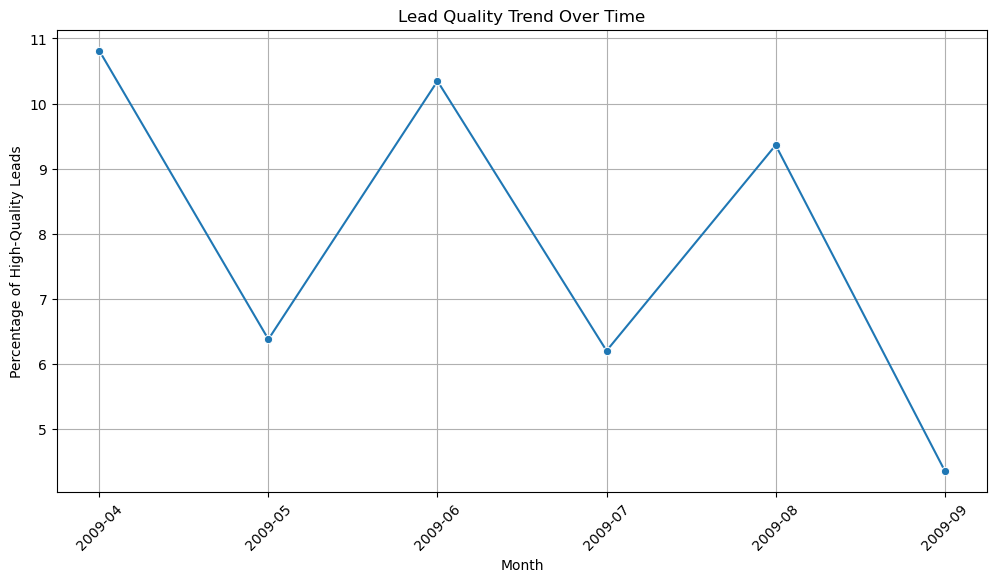

In [53]:
# Convert 'Month' from Period to string
monthly_quality['Month'] = monthly_quality['Month'].astype(str)

# Plotting lead quality trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_quality, x='Month', y='High Quality Percentage', marker='o')
plt.title('Lead Quality Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Percentage of High-Quality Leads')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Q1.Ans: Yes, we see a declining rate of high quality sales lead over time. 

In [60]:
## calculating significance of this result using linear regression
from scipy.stats import linregress

# Convert 'Month' to numeric values for regression
monthly_quality['Month_Num'] = range(len(monthly_quality))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(monthly_quality['Month_Num'], monthly_quality['High Quality Percentage'])

print(f"Slope: {slope}")
print(f"p-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("The trend is statistically significant.")
else:
    print("The trend is not statistically significant.")


Slope: -0.7842653655351272
p-value: 0.2476443054922391
The trend is not statistically significant.


In [70]:
import pymannkendall as mk

# Apply Mann-Kendall test
result = mk.original_test(monthly_quality['High Quality Percentage'])

print(result)

# Interpret results
if result.p < 0.05:
    print("The trend is statistically significant.")
else:
    print("The trend is not statistically significant.")


Mann_Kendall_Test(trend='no trend', h=False, p=0.13285495573105388, z=-1.502938298604359, Tau=-0.6, s=-9.0, var_s=28.333333333333332, slope=-0.5047113071371292, intercept=9.131798737060269)
The trend is not statistically significant.


## Q1.Ans. Part 2. We apply both linear regression and pymannkendall technique to see if the declining rate is statistically significant. Since, p-value is greater than 0.05 in both cases, hence we have to conclude that this observation is not statistically significant.

## 2) Drivers of lead quality

## by widget name

In [80]:
# Aggregate data by WidgetName
widget_quality = df.groupby('WidgetName')['Lead Quality'].value_counts(normalize=True).unstack().fillna(0)
widget_quality['High Quality Percentage'] = widget_quality['High'] * 100

# Reset index for plotting
widget_quality = widget_quality.reset_index()
widget_quality

Lead Quality,WidgetName,High,Low,Medium,Unknown,High Quality Percentage
0,w-300250-DebtReduction1-1DC,0.097701,0.109195,0.063218,0.729885,9.770115
1,w-300250-DebtReduction1-1DC-BlueMeter,0.141304,0.043478,0.010870,0.804348,14.130435
2,w-300250-DebtReduction1-1DC-CreditSolutions,0.155844,0.064935,0.077922,0.701299,15.584416
3,w-300250-DebtReduction1-1DC-Head2,0.123596,0.089888,0.033708,0.752809,12.359551
4,w-300250-DebtReduction1-1DC-Head3,0.053333,0.093333,0.013333,0.840000,5.333333
5,w-300250-DebtReduction1-1DC-white,0.166667,0.000000,0.000000,0.833333,16.666667
6,w-300250-DebtReduction1-2DC-BlueMeter,0.068966,0.103448,0.068966,0.758621,6.896552
7,w-300250-DebtReduction1-2DC-CreditSolutions,0.080000,0.160000,0.026667,0.733333,8.000000
8,w-302252-DebtReduction1-1DC,0.084559,0.095588,0.033088,0.786765,8.455882
9,w-302252-DebtReduction1-1DC-CreditSolutions,0.072106,0.089184,0.052182,0.786528,7.210626


C:\Users\abhij\AppData\Local\Temp\ipykernel_12316\1352324567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=widget_quality, x='High Quality Percentage', y='WidgetName', palette='viridis')


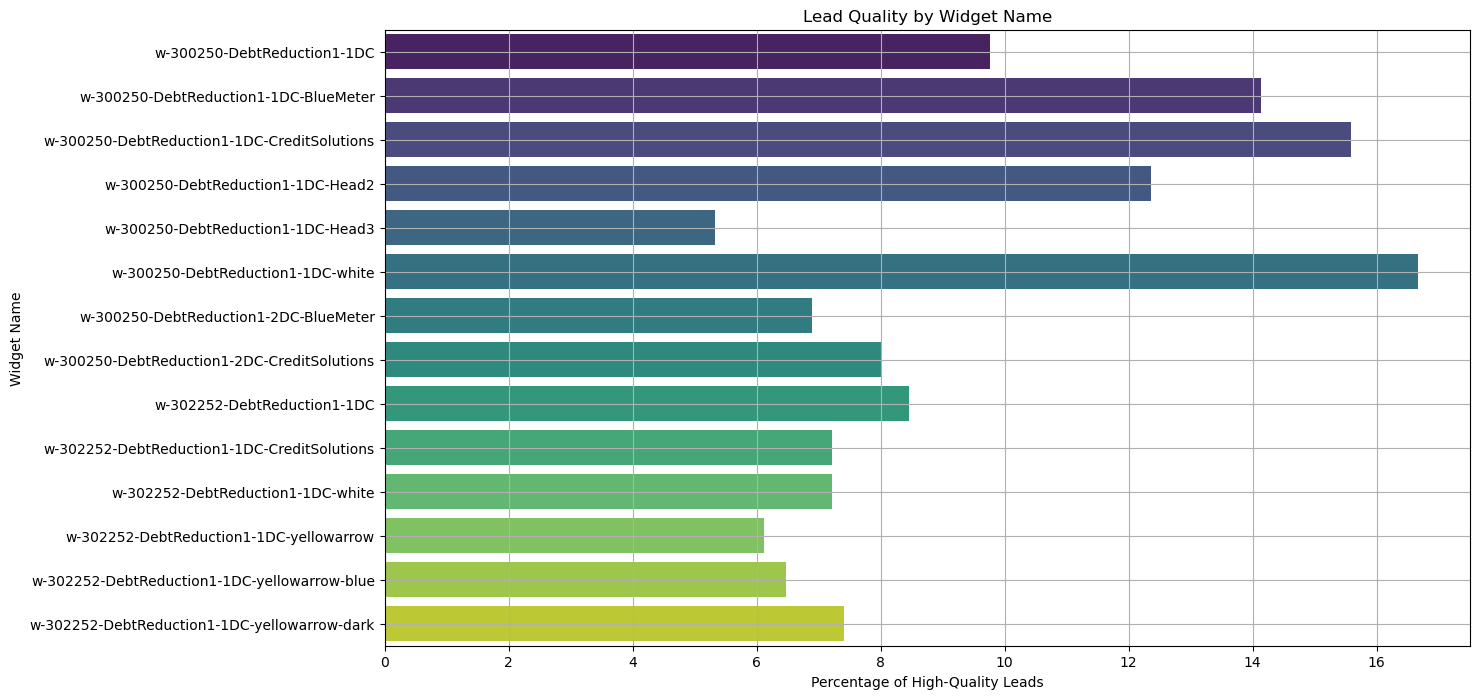

In [96]:
# Plot lead quality by WidgetName
plt.figure(figsize=(14, 8))
sns.barplot(data=widget_quality, x='High Quality Percentage', y='WidgetName', palette='viridis')
plt.title('Lead Quality by Widget Name')
plt.ylabel('Widget Name')
plt.xlabel('Percentage of High-Quality Leads')
plt.grid(True)
plt.show()

## The following observations cab be made with the results shown:
## 1) 1DC forms are preferred to 2DC forms due to it's efficiency of having all questions on the same page
## 2) As we can see in the case of w-300250-DebtReduction1-1DC-Head2 and w-300250-DebtReduction1-1DC-Head3 forms, in spite of having exactly same content and style head2 is preferred. Only difference was head2 form was making a deal as headline while head3 form was asking if the customer needs help. 
## 3) Another observation is forms with initial w-300350 had simple and bold fonts, while forms with initial w-302252 had cursive letters. The former one being able to attarct more high quality leads shows that bold letters are preferred over cusrive letters.

## by publisher zone name

C:\Users\abhij\AppData\Local\Temp\ipykernel_12316\3731653260.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_quality, x='PublisherZoneName', y='High Quality Percentage', palette='coolwarm')


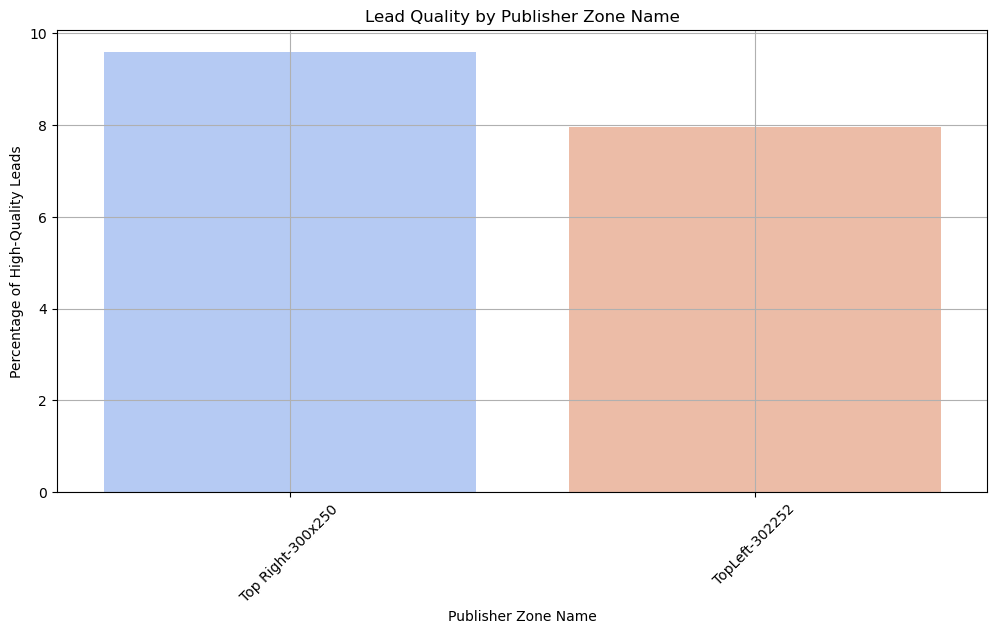

In [102]:
# Aggregate data by PublisherZoneName
zone_quality = df.groupby('PublisherZoneName')['Lead Quality'].value_counts(normalize=True).unstack().fillna(0)
zone_quality['High Quality Percentage'] = zone_quality['High'] * 100

# Reset index for plotting
zone_quality = zone_quality.reset_index()

# Plot lead quality by PublisherZoneName
plt.figure(figsize=(12, 6))
sns.barplot(data=zone_quality, x='PublisherZoneName', y='High Quality Percentage', palette='coolwarm')
plt.title('Lead Quality by Publisher Zone Name')
plt.xlabel('Publisher Zone Name')
plt.ylabel('Percentage of High-Quality Leads')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Conslusion: even thou top right is able to bring more high quality leads but difference is not much significant

## By publisher campaign name

C:\Users\abhij\AppData\Local\Temp\ipykernel_12316\2045196127.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=campaign_quality, x='PublisherCampaignName', y='High Quality Percentage', palette='magma')


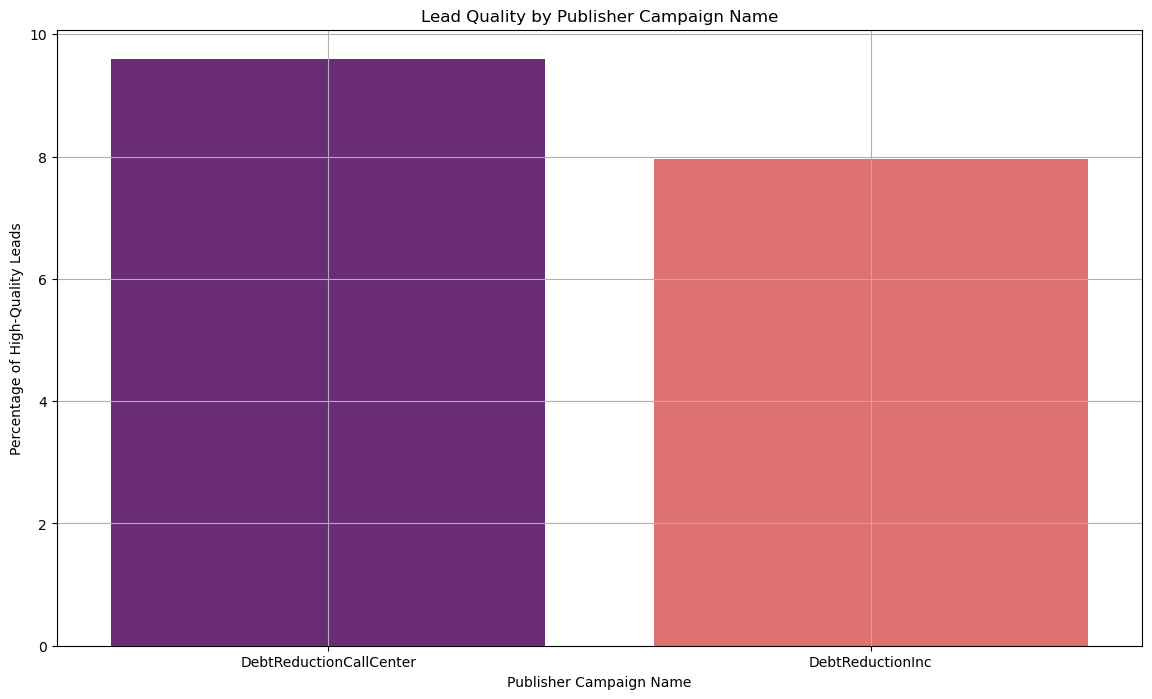

In [109]:
# Aggregate data by PublisherCampaignName
campaign_quality = df.groupby('PublisherCampaignName')['Lead Quality'].value_counts(normalize=True).unstack().fillna(0)
campaign_quality['High Quality Percentage'] = campaign_quality['High'] * 100

# Reset index for plotting
campaign_quality = campaign_quality.reset_index()

# Plot lead quality by PublisherCampaignName
plt.figure(figsize=(14, 8))
sns.barplot(data=campaign_quality, x='PublisherCampaignName', y='High Quality Percentage', palette='magma')
plt.title('Lead Quality by Publisher Campaign Name')
plt.xlabel('Publisher Campaign Name')
plt.ylabel('Percentage of High-Quality Leads')
plt.grid(True)
plt.show()

## Conslusion: even thou debtreduction call centercampaign is able to bring more high quality leads but difference is not much significant

## By address score and phone score

In [118]:
# Create a combined DataFrame for AddressScore and PhoneScore
score_quality = df.groupby(['AddressScore', 'PhoneScore'])['Lead Quality'].value_counts(normalize=True).unstack().fillna(0)
score_quality['High Quality Percentage'] = score_quality['High'] * 100

# Reset index for plotting
score_quality = score_quality.reset_index()

# Pivot the DataFrame correctly
pivot_table = score_quality.pivot(index='AddressScore', columns='PhoneScore', values='High Quality Percentage')
pivot_table

PhoneScore,1.0,2.0,3.0,4.0,5.0
AddressScore,,,,,
1.0,NaN,0.000000,6.060606,0.000000,7.317073
2.0,NaN,0.000000,14.285714,0.000000,12.500000
3.0,NaN,6.250000,4.255319,6.666667,NaN
4.0,NaN,0.000000,4.761905,0.000000,0.000000
5.0,0.0,5.681818,6.611570,6.024096,8.333333


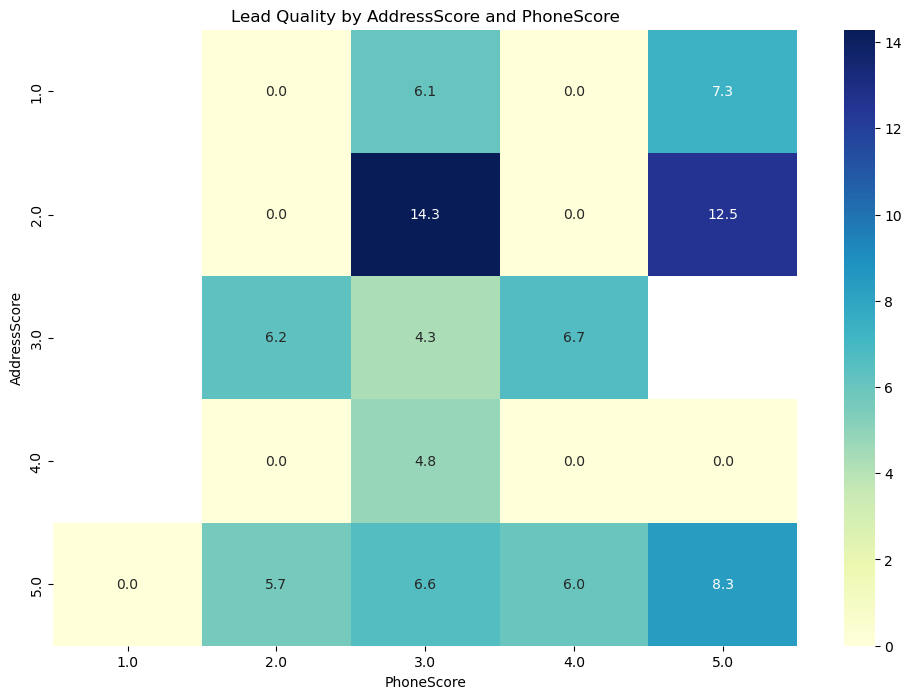

In [120]:
# Plot lead quality by AddressScore and PhoneScore
plt.figure(figsize=(12, 8))
sns.heatmap(data=pivot_table, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Lead Quality by AddressScore and PhoneScore')
plt.xlabel('PhoneScore')
plt.ylabel('AddressScore')
plt.show()

## Conslusion: phonescore and addressscore has no positive or neagtive impace on the high quality leads. Their contribution is insignificant

### 3) Investing areas of oppertunity

In [125]:
# Calculate current lead quality rate
current_quality_rate = df['Lead Quality'].value_counts(normalize=True).get('High', 0) * 100

# Desired quality rate
desired_quality_rate = current_quality_rate * 1.20

print(f"Current Quality Rate: {current_quality_rate:.2f}%")
print(f"Desired Quality Rate: {desired_quality_rate:.2f}%")


Current Quality Rate: 2.78%
Desired Quality Rate: 3.33%


## by debt level

C:\Users\abhij\AppData\Local\Temp\ipykernel_12316\402487481.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=debt_quality, x='DebtLevel', y='High Quality Percentage', palette='crest')


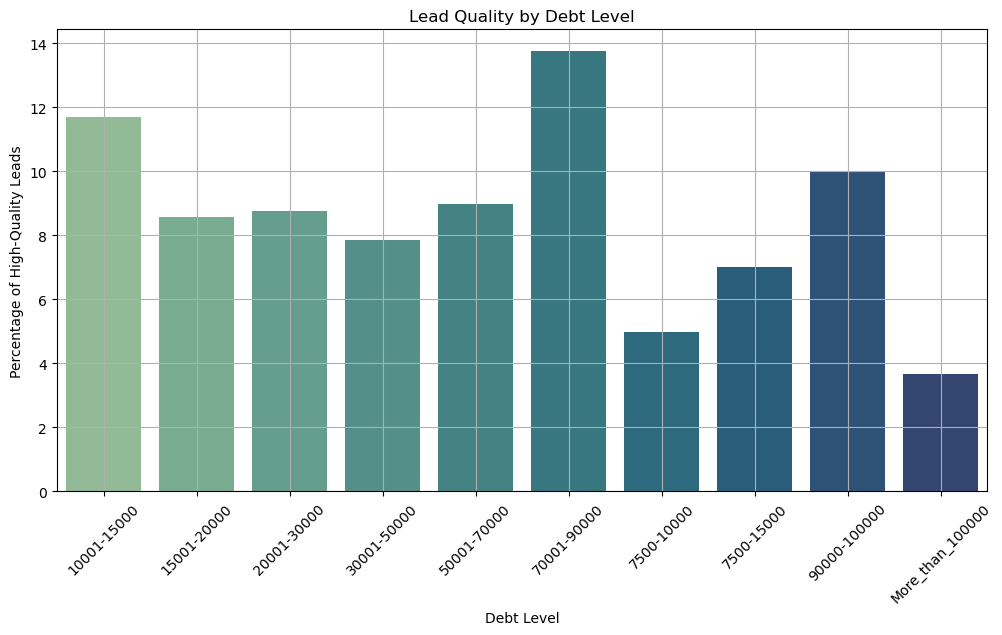

In [139]:
# Example visualization of opportunities by debt level
debt_quality = df.groupby('DebtLevel')['Lead Quality'].value_counts(normalize=True).unstack().fillna(0)
debt_quality['High Quality Percentage'] = debt_quality['High'] * 100
debt_quality = debt_quality.reset_index()

# Plot lead quality by Debt Level
plt.figure(figsize=(12, 6))
sns.barplot(data=debt_quality, x='DebtLevel', y='High Quality Percentage', palette='crest')
plt.title('Lead Quality by Debt Level')
plt.xlabel('Debt Level')
plt.ylabel('Percentage of High-Quality Leads')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Conclusion: Debt levels don't help us in identifying oppertunities

## by partner

C:\Users\abhij\AppData\Local\Temp\ipykernel_12316\2250416250.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=debt_quality, x='Partner', y='High Quality Percentage', palette='crest')


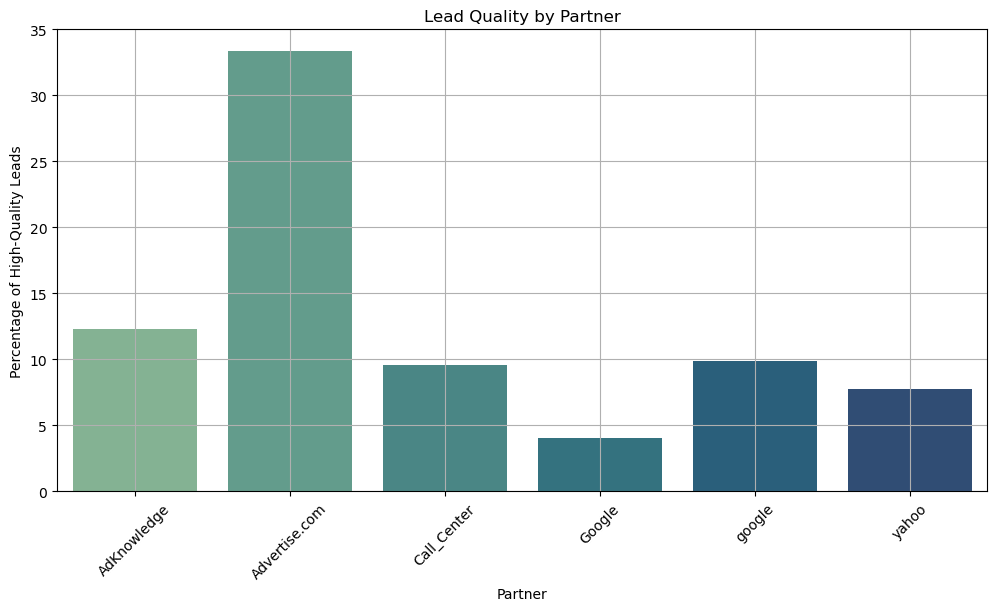

In [151]:
# Example visualization of opportunities by debt level
debt_quality = df.groupby('Partner')['Lead Quality'].value_counts(normalize=True).unstack().fillna(0)
debt_quality['High Quality Percentage'] = debt_quality['High'] * 100
debt_quality = debt_quality.reset_index()

# Plot lead quality by Debt Level
plt.figure(figsize=(12, 6))
sns.barplot(data=debt_quality, x='Partner', y='High Quality Percentage', palette='crest')
plt.title('Lead Quality by Partner')
plt.xlabel('Partner')
plt.ylabel('Percentage of High-Quality Leads')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Conclusion: Advertise.com is able to bring more high quality leads compared to others.

## By Adgroup

C:\Users\abhij\AppData\Local\Temp\ipykernel_12316\4056592807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=debt_quality, x='AdGroup', y='High Quality Percentage', palette='crest')


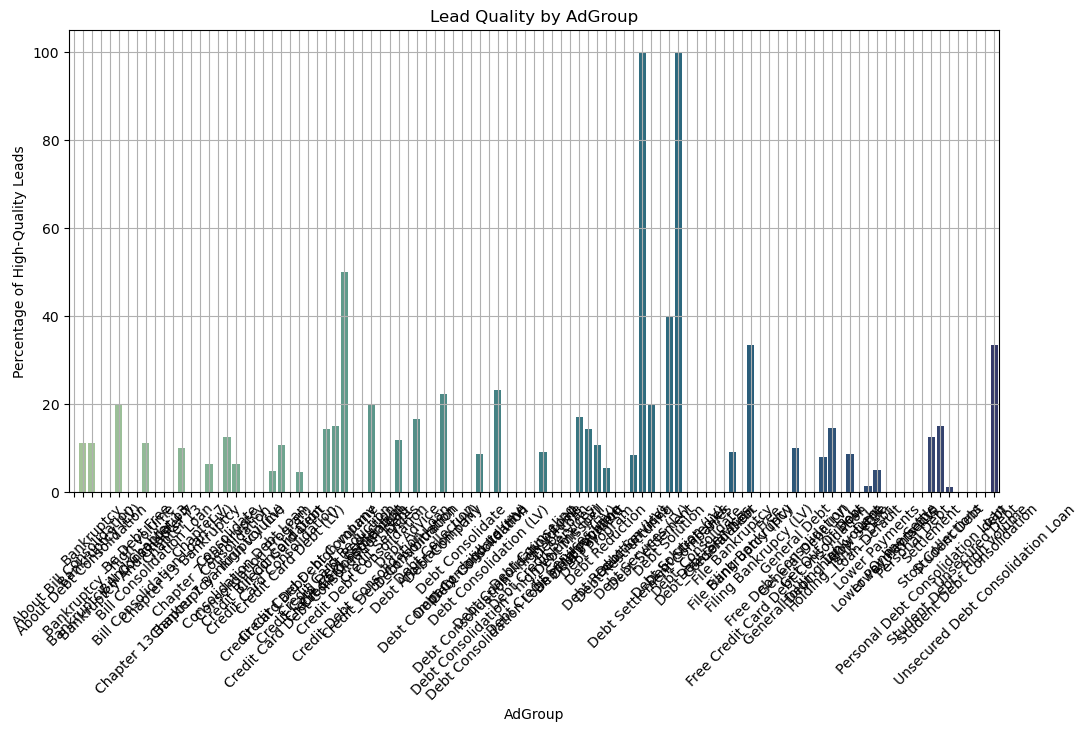

In [153]:
# Example visualization of opportunities by debt level
debt_quality = df.groupby('AdGroup')['Lead Quality'].value_counts(normalize=True).unstack().fillna(0)
debt_quality['High Quality Percentage'] = debt_quality['High'] * 100
debt_quality = debt_quality.reset_index()

# Plot lead quality by Debt Level
plt.figure(figsize=(12, 6))
sns.barplot(data=debt_quality, x='AdGroup', y='High Quality Percentage', palette='crest')
plt.title('Lead Quality by AdGroup')
plt.xlabel('AdGroup')
plt.ylabel('Percentage of High-Quality Leads')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## By AdvertiserCampaignName

C:\Users\abhij\AppData\Local\Temp\ipykernel_12316\4019347572.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=debt_quality, x='AdvertiserCampaignName', y='High Quality Percentage', palette='crest')


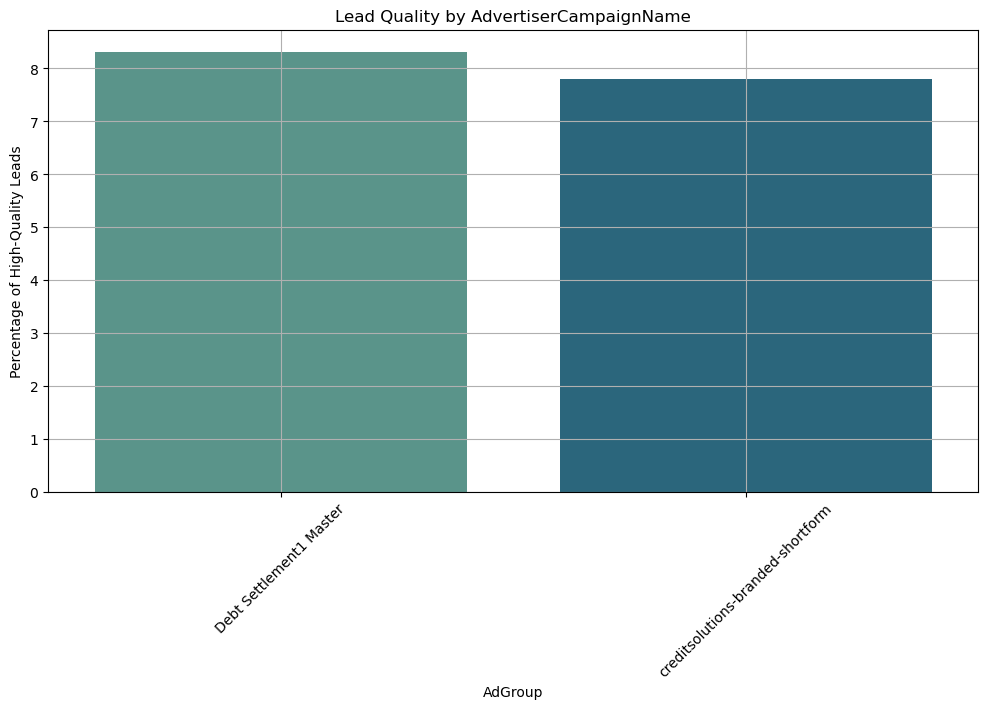

In [161]:
# Example visualization of opportunities by AdvertiserCampaignName
debt_quality = df.groupby('AdvertiserCampaignName')['Lead Quality'].value_counts(normalize=True).unstack().fillna(0)
debt_quality['High Quality Percentage'] = debt_quality['High'] * 100
debt_quality = debt_quality.reset_index()

# Plot lead quality by Debt Level
plt.figure(figsize=(12, 6))
sns.barplot(data=debt_quality, x='AdvertiserCampaignName', y='High Quality Percentage', palette='crest')
plt.title('Lead Quality by AdvertiserCampaignName')
plt.xlabel('AdGroup')
plt.ylabel('Percentage of High-Quality Leads')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Conclusion: AdvertiserCampaignName is also insignificant

## By State

C:\Users\abhij\AppData\Local\Temp\ipykernel_12316\796532407.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=debt_quality, x='State', y='High Quality Percentage', palette='crest')


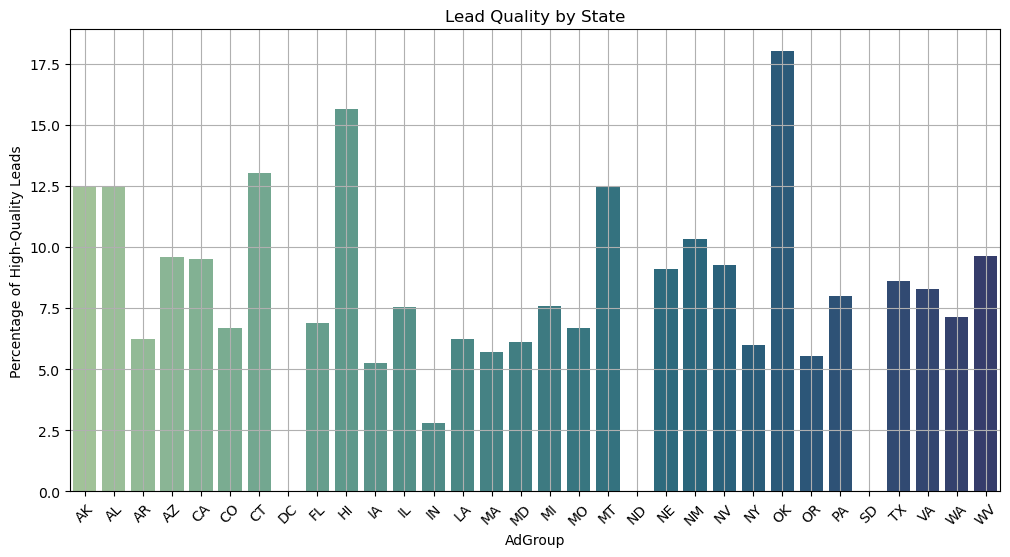

In [167]:
# Example visualization of opportunities by state
debt_quality = df.groupby('State')['Lead Quality'].value_counts(normalize=True).unstack().fillna(0)
debt_quality['High Quality Percentage'] = debt_quality['High'] * 100
debt_quality = debt_quality.reset_index()

# Plot lead quality by Debt Level
plt.figure(figsize=(12, 6))
sns.barplot(data=debt_quality, x='State', y='High Quality Percentage', palette='crest')
plt.title('Lead Quality by State')
plt.xlabel('AdGroup')
plt.ylabel('Percentage of High-Quality Leads')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## no direct relation seen through state

## Q.3 Ans:
## The following things we can do to increase lead quality:
## i) Concentrate more on forms with:
##       a) 1DC format
##       b) bold and classic font 
##       c) statemnts instead of questions on header.
## ii) Launch more campaigns through advertise.com